# **TSF GRIP INTERNSHIP : TASK 1**

**Author : Ameni CHAABOUNI**



*   **Adding Libraries**



In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split

*  **Importing Dataset From The Link**

In [2]:
URL='http://bit.ly/w-data'
score=pd.read_csv(URL)

*  **Dataset Content Display**

In [3]:
score

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30
5,1.5,20
6,9.2,88
7,5.5,60
8,8.3,81
9,2.7,25


*  **Get The First n Rows**

In [4]:
score.head(n=5)

,Hours,Scores
0,2.5,21
1,5.1,47
2,3.2,27
3,8.5,75
4,3.5,30


*  **Input Data Visualisation**

In [5]:
def scatterplot(x_data, y_data, x_label="", y_label="", title="", color = "r", yscale_log=False):

    # Create the plot object
    _, ax = plt.subplots()

    # Plot the data, set the size (s), color and transparency (alpha) of the points
    ax.scatter(x_data, y_data, s = 10, color = color, alpha = 0.75)

    if yscale_log == True:
        ax.set_yscale('log')

    # Label the axes and provide a title
    ax.set_title(title)
    ax.set_xlabel(x_label)
    ax.set_ylabel(y_label)

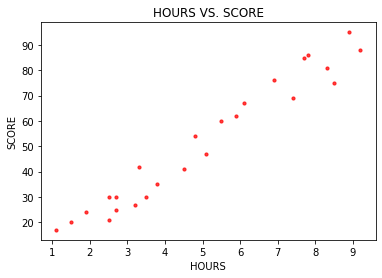

In [7]:
scatterplot(score.Hours , score.Scores , "HOURS" ,"SCORE","HOURS VS. SCORE",color="r",yscale_log=False)

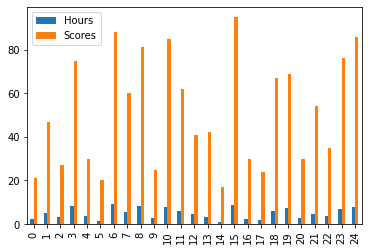

In [21]:
score.plot(kind='bar')
plt.show()

*  **Data Prepocessing**

In [8]:
x=score.iloc[:,:-1].values
y=score.iloc[:,1].values

*  **Model Training**

In [10]:
x_train,x_test, y_train, y_test = train_test_split(x, y, test_size = 0.3, random_state = 30)
#Fitting the Multiple Linear Regression model
LR = LinearRegression()  
LR.fit(x_train.reshape(-1,1), y_train)

LinearRegression()

*  **Model Equation**

In [11]:
#Intercept and Coefficient
print("Intercept: ", LR.intercept_)
print("Coefficients:")
list(zip(x, LR.coef_))

Intercept:  3.1671831096872367
Coefficients:


[(array([2.5]), 9.743310312229196)]

*  **Plotting The Regression Line** 

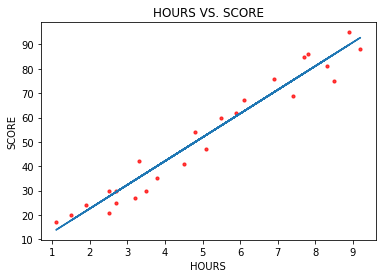

In [13]:
line = LR.coef_*x + LR.intercept_
scatterplot(score.Hours , score.Scores , "HOURS" ,"SCORE","HOURS VS. SCORE",color="r",yscale_log=False)
plt.plot(x,line)
plt.show()

*  **Predictions**

In [15]:
print(x_test)
#Prediction of test set
y_pred_LR= LR.predict(x_test)

[[7.7]
 [2.5]
 [7.4]
 [2.5]
 [6.9]
 [9.2]
 [3.5]
 [8.3]]


*  **Actual values and the predicted values**

In [17]:
#Actual value and the predicted value
LR_diff = pd.DataFrame({'Actual value': y_test, 'Predicted value': y_pred_LR})
LR_diff

,Actual value,Predicted value
0,85,78.190673
1,30,27.525459
2,69,75.267679
3,21,27.525459
4,76,70.396024
5,88,92.805638
6,30,37.268769
7,81,84.036659


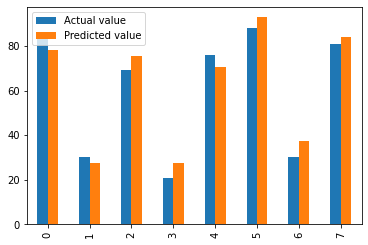

In [22]:
LR_diff.plot(kind='bar')
plt.show()

*  **Model Evaluation**

In [23]:
#Model Evaluation
from sklearn import metrics
meanAbErr = metrics.mean_absolute_error(y_test, y_pred_LR)
meanSqErr = metrics.mean_squared_error(y_test, y_pred_LR)
rootMeanSqErr = np.sqrt(metrics.mean_squared_error(y_test, y_pred_LR))
print('R squared: {:.2f}'.format(LR.score(x,y)*100))
print('Mean Absolute Error:', meanAbErr)
print('Mean Square Error:', meanSqErr)
print('Root Mean Square Error:', rootMeanSqErr)

R squared: 95.25
Mean Absolute Error: 5.34900606601717
Mean Square Error: 31.363839476433306
Root Mean Square Error: 5.600342799903708


*  **Checking For The Case Given In Task**

In [18]:
hours=9.25
pred=LR.predict(np.array(hours).reshape(1,-1))
print("Prediction=",pred[0])

Prediction= 93.29280349780731


## **Prediction= 93.29280349780731**